# 线性回归

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
#我们定义房价数据
# x指年份，减去了2009
# 10个样本，1个特征
# 10 x 1
x = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]], dtype=np.float32).T

# y指房价，除以了10000
# 10个样本，每个样本有一个真值
# 10 x 1
y = np.array([[1.8, 2.1, 2.3, 2.3, 2.85, 3.0, 3.3, 4.9, 5.45, 5.0]], dtype=np.float32).T

x = x / 10.0
y = y / 10.0

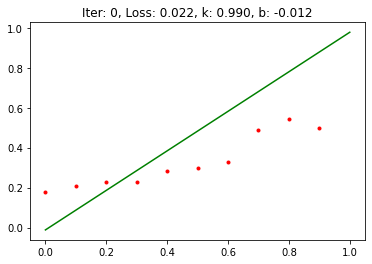

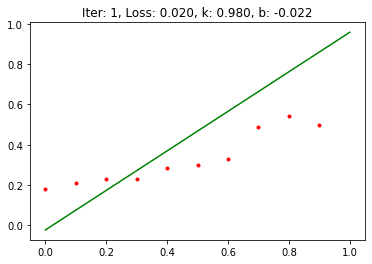

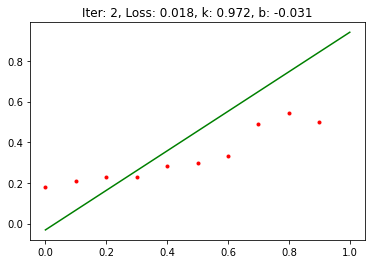

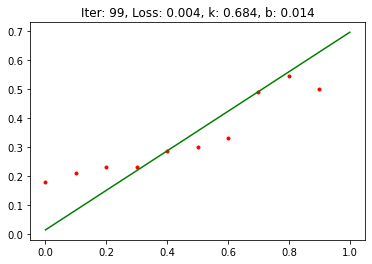

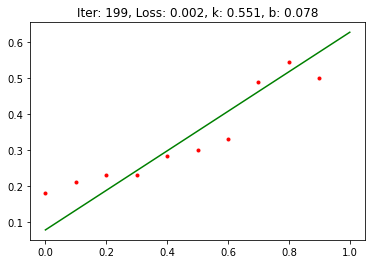

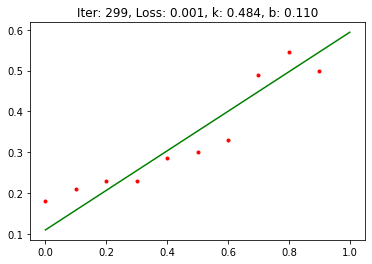

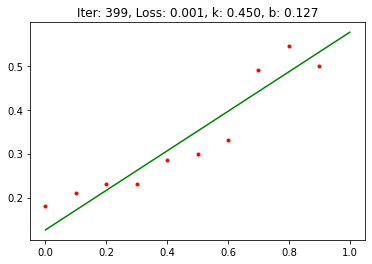

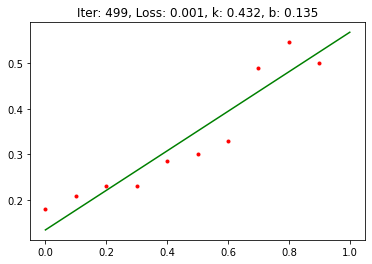

In [5]:
lr = 0.1
k = 1  # random.random()   通常初始化为随机数
b = 0
epochs = 500  # 总共迭代轮数
batch_size = x.shape[0]

# 创建一个新的画板
plt.figure()

for i in range(epochs):
    
    # 使用k和b预测所有的可能房价
    predict = k * x + b
    
    loss = np.sum((y - predict) ** 2) * 0.5 / batch_size
    
    delta_g = (y - predict) / batch_size
    delta_predict = delta_g * (-1)
    delta_k = np.sum(delta_predict * x)
    delta_b = np.sum(delta_predict * 1)
    
    k = k - lr * delta_k
    b = b - lr * delta_b
    
    if (i + 1) % 100 == 0 or i < 3:
        
        # 为了画模型的直线显示而用
        tx = np.array([[0, 1]]).T
        ty = k * tx + b
        
        plt.clf()
        plt.title(f"Iter: {i}, Loss: {loss:.3f}, k: {k:.3f}, b: {b:.3f}")
        plt.plot(x, y, "r.")
        plt.plot(tx, ty, "g-")
        
        # 锁定坐标系
#         plt.axis([0, 1, 0, 1])
        
        # 在窗口界面下有效，jupyter下无效
        # 等待并刷新，时间是0.01秒
        plt.pause(0.01)

In [14]:
px = (2021 - 2009) / 10.0
py = k * px + b
py = py * 10   # 单位是万元

print(f"预测2021年房价是：{py:.3f} 万元")

预测2021年房价是：6.536 万元


In [15]:
"%.3f" % py   #  C语言的格式化

'6.536'

In [16]:
np.array([1, 2]).shape

(2,)

In [17]:
np.array([[1, 2]]).shape

(1, 2)

In [19]:
np.array([[1, 2]]).T.shape    # 行数，定义为样本数。列数，定义为特征数

(2, 1)

In [20]:
x.shape, y.shape

((10, 1), (10, 1))

In [7]:
# theat^T X
# X @ theta
# X.shape = 10x1 = 10x2   # 第0列，恒等于1
num_sample = x.shape[0]
num_feature = x.shape[1]
num_output = 1
X = np.ones((num_sample, 1 + num_feature))
X[:, 1:] = x
X

array([[1.        , 0.        ],
       [1.        , 0.1       ],
       [1.        , 0.2       ],
       [1.        , 0.30000001],
       [1.        , 0.40000001],
       [1.        , 0.5       ],
       [1.        , 0.60000002],
       [1.        , 0.69999999],
       [1.        , 0.80000001],
       [1.        , 0.89999998]])

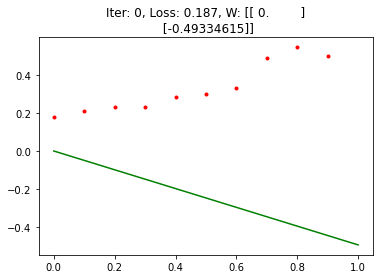

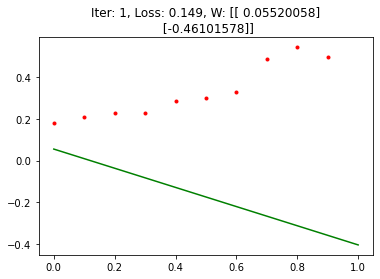

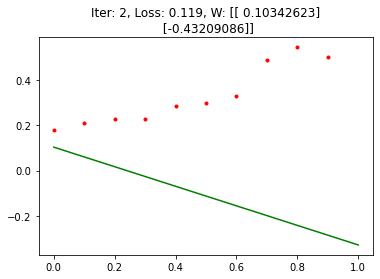

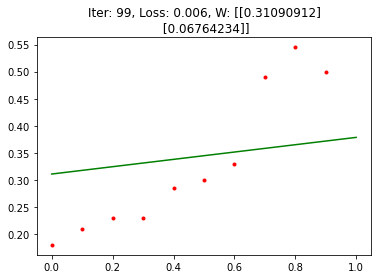

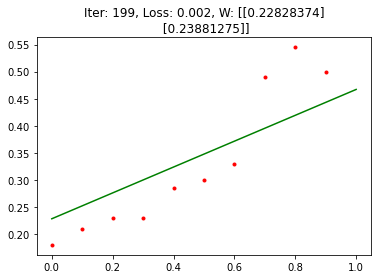

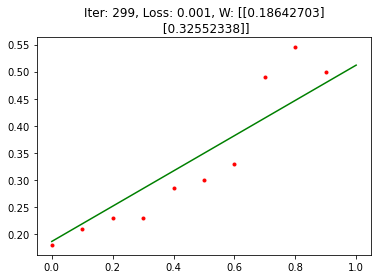

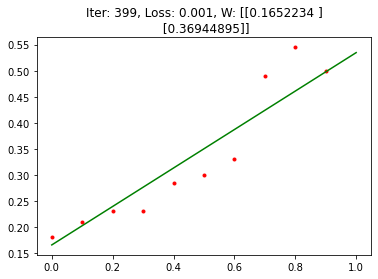

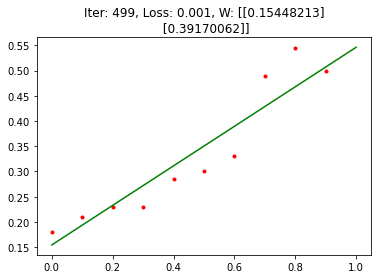

In [13]:
# theta -> W
# theta.shape -> 2x1
W = np.zeros((1 + num_feature, num_output))

# theta0 是偏置
# 偏置的初始化通常是0
W[0] = 0

# 初始化theta0以外的权重，就是k嘛
W[1:] = np.random.normal(0, 1.0, size=(num_feature, num_output))
epochs = 500
lr = 0.1
batch_size = X.shape[0]

for i in range(epochs):
    
    predict = X @ W
    loss = np.sum((y - predict) ** 2) * 0.5 / batch_size
    
    # deltaA = G @ B^T
    # deltaB = A^T @ G
    # delta_predict
    G = (y - predict) / batch_size * (-1)
    
    if (i + 1) % 100 == 0 or i < 3:
        
        # 为了画模型的直线显示而用
        tx = np.array([
            [1, 0],
            [1, 1]
        ])
        ty = tx @ W
        
        plt.clf()
        plt.title(f"Iter: {i}, Loss: {loss:.3f}, W: {W}")
        plt.plot(x, y, "r.")
        plt.plot(tx[:,1], ty, "g-")
        
        # 锁定坐标系
#         plt.axis([0, 1, 0, 1])
        
        # 在窗口界面下有效，jupyter下无效
        # 等待并刷新，时间是0.01秒
        plt.pause(0.01)
        
    delta_W = X.T @ G
    W = W - lr * delta_W

# 今日总结：
0. 定义
    - 离散变量预测，为分类
    - 连续变量预测，为回归
1. 一元线性回归模型定义
    - $ h_{\theta} = \theta_0 x_0 + \theta_1 x_1 (x_0 = 1) $
    - 形式等价为：y = kx + b
2. 多元线性回归模型
    - $ h_{\theta} = \theta^{T} X (x_0 = 1) $
    - 含义：每一项特征值的加权求和。可解释性很强
3. 误差项分析
    - 对误差进行高斯建模，中心极限定理
    - 极大似然估计，为概率密度函数连乘，使用log转为连加。最后推导得到 
        - $ J(\theta) = -\frac{1}{2} \sum_{i=1}^{n}(y_i - \theta^T X_i)^2 $
        - 对其取反，得到求极小值：
            - $ J(\theta) = \frac{1}{2} \sum_{i=1}^{n}(y_i - \theta^T X_i)^2 $
            - $ J(\theta) $ 称之为，损失函数、代价函数或者L2Loss、MSE
4. 最优化方法
    - 一元线性回归时，可以用普通最小二乘法
    - 多元线性回归时，考虑矩阵形式的最小二乘法
        - 函数偏导数为0的点推导出来的公式
        - $ Y = A \beta $
        - $ \min ||A \beta - Y||_{2}^{2} $
        - 最小二乘法公式：$ \beta = (A^T A)^{-1} A^T Y $
        - 限制：$ A^T A $ 可能没有逆矩阵。回导致无法计算
        - 缺点：求逆运算，计算量和复杂度都很高。当数据规模很大时，不好使
    - 梯度下降法
5. 细节
    - 对于梯度，取sum还是取mean
        - 矛盾1，如果取sum，则样本数直接影响梯度值幅度。样本过大，梯度会爆炸
        - 矛盾2，loss也会因为样本数过大，而变得十分庞大
        - 解决矛盾，在loss定义时，除以当前迭代的样本数（batch_size）
        - 也因此，求导时，就得处理batch_size。解决矛盾
    - 矩阵求导，对于loss = f(C),  C = AB, deltaC = G
        - deltaA = G @ B^T
        - deltaB = A^T @ G
    - np.array([1, 2, 3]).shape，维度是(3,)，是个元组。理解为行向量。宽度为3
    - np.array([[1, 2, 3]]).T 维度(3, 1)，这种定义方式比较接近数学上的表达
    - 除以batch_size后，学习率可以给大一些
        - 数据归一化、loss取均值后，多数超参数，通常可以复用
    - 权重的初始化问题
        - 权重，也就是k，一般初始化为随机数（或者正态分布等），偏置(bias)，一般设置为0，或者根据特殊情况设置为特殊值